In [38]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

- analyze only the users and not the admins

In [39]:
views = pd.io.sql.read_sql("SELECT uid, datetime FROM pageviews WHERE uid LIKE 'user_%'", conn, parse_dates=['datetime'])
df_1 = views['datetime'].dt.floor('d').value_counts()
df_1 = df_1.rename_axis('date')
df_1 = df_1.reset_index(name='views')
df_1 = df_1.set_index('date')
df_1.head()

,views
date,
2020-05-11,200
2020-05-14,187
2020-05-10,110
2020-05-13,102
2020-05-12,85


In [40]:
checkers = pd.io.sql.read_sql("SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'", conn, parse_dates=['timestamp'])
df_2 = checkers['timestamp'].dt.floor('d').value_counts()
df_2 = df_2.rename_axis('date')
df_2 = df_2.reset_index(name='commits')
df_2 = df_2.set_index('date')
df_2.head()

,commits
date,
2020-05-14,575
2020-05-12,323
2020-04-26,261
2020-05-02,242
2020-05-13,211


- analyze only the dates when there were both views and checker commits

In [41]:
df = pd.concat([df_1, df_2], axis=1)
df = df.dropna()

- use size of the font should be 8
- the size of the figure is (15,8)

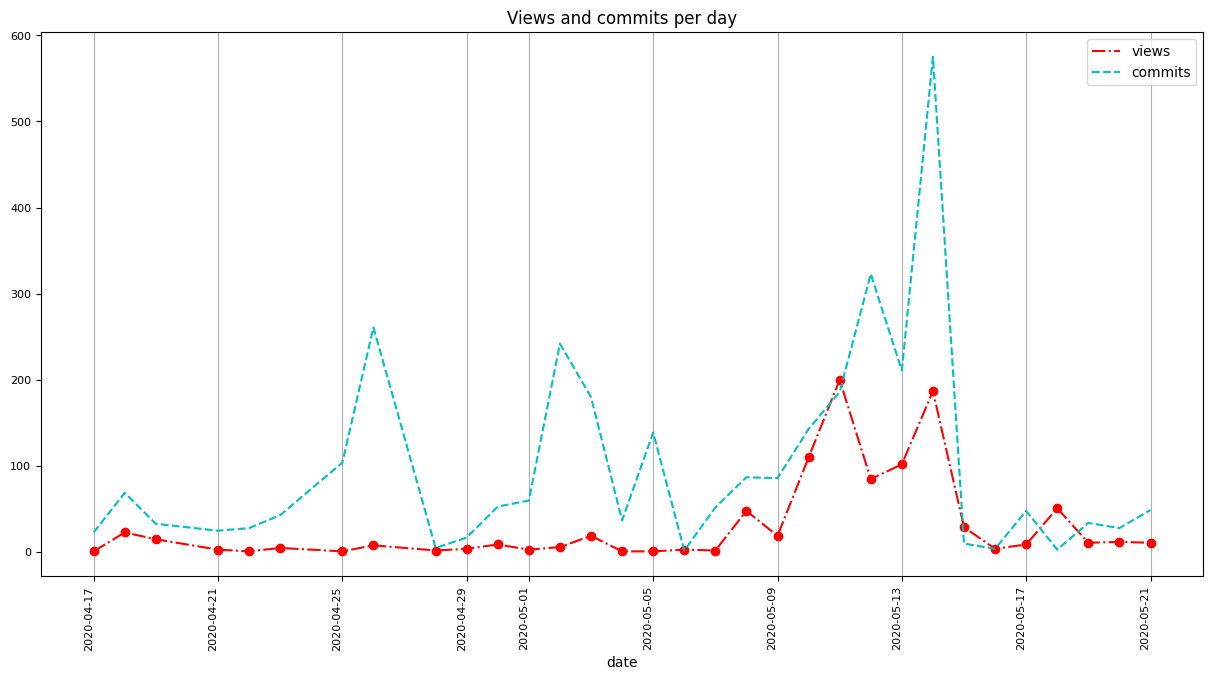

In [42]:
ax = df.plot(figsize=(15, 8), title='Views and commits per day', color=['r', 'c'], style=['-.', '--'], rot=90, fontsize=8)
ax.get_lines()[0].set_marker('o')
ax.grid(axis='x')
conn.close()

“How many times was the number of views larger than 150?”

“The answer is 2”.